In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# importing relevant libraries
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors


In [5]:
df1 = pd.read_csv('../../data/ml-latest-small/tags.csv')
df1.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [6]:
df1 = df1.drop(columns=['timestamp'],  axis=1)
df1

,userId,movieId,tag
0,2,60756,funny
1,2,60756,Highly quotable
2,2,60756,will ferrell
3,2,89774,Boxing story
4,2,89774,MMA
...,...,...,...
3678,606,7382,for katie
3679,606,7936,austere
3680,610,3265,gun fu
3681,610,3265,heroic bloodshed


In [7]:
df2 = pd.read_csv('../../data/ml-latest-small/movies.csv')
df2.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
df3 = pd.read_csv('../../data/ml-latest-small/ratings.csv')
df3.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [9]:
df3 = df3.drop(columns=['timestamp'],  axis=1)
df3

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [10]:
df4 = pd.read_csv('../../data/ml-latest-small/links.csv')
df4

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [11]:
df = df2.merge(df3,on='movieId')
df

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5
...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5
100833,193585,Flint (2017),Drama,184,3.5
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5


In [12]:
df = df.merge(df4, on='movieId')
df

,movieId,title,genres,userId,rating,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,114709,862.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,114709,862.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,114709,862.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,114709,862.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,114709,862.0
...,...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,5476944,432131.0
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,5914996,445030.0
100833,193585,Flint (2017),Drama,184,3.5,6397426,479308.0
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,8391976,483455.0


## Splitting the genres

In [13]:
df['new_genres'] = df['genres'].str.split('|', 10)

In [14]:
df = df.explode('new_genres')

In [15]:
df = df.drop(columns=['genres'], axis=1)

In [16]:
df

,movieId,title,userId,rating,imdbId,tmdbId,new_genres
0,1,Toy Story (1995),1,4.0,114709,862.0,Adventure
0,1,Toy Story (1995),1,4.0,114709,862.0,Animation
0,1,Toy Story (1995),1,4.0,114709,862.0,Children
0,1,Toy Story (1995),1,4.0,114709,862.0,Comedy
0,1,Toy Story (1995),1,4.0,114709,862.0,Fantasy
...,...,...,...,...,...,...,...
100832,193583,No Game No Life: Zero (2017),184,3.5,5914996,445030.0,Fantasy
100833,193585,Flint (2017),184,3.5,6397426,479308.0,Drama
100834,193587,Bungo Stray Dogs: Dead Apple (2018),184,3.5,8391976,483455.0,Action
100834,193587,Bungo Stray Dogs: Dead Apple (2018),184,3.5,8391976,483455.0,Animation


In [17]:
df = df.merge(df1,on='movieId')
df

,movieId,title,userId_x,rating,imdbId,tmdbId,new_genres,userId_y,tag
0,1,Toy Story (1995),1,4.0,114709,862.0,Adventure,336,pixar
1,1,Toy Story (1995),1,4.0,114709,862.0,Adventure,474,pixar
2,1,Toy Story (1995),1,4.0,114709,862.0,Adventure,567,fun
3,1,Toy Story (1995),1,4.0,114709,862.0,Animation,336,pixar
4,1,Toy Story (1995),1,4.0,114709,862.0,Animation,474,pixar
...,...,...,...,...,...,...,...,...,...
765266,193565,Gintama: The Movie (2010),184,3.5,1636780,71172.0,Comedy,184,remaster
765267,193565,Gintama: The Movie (2010),184,3.5,1636780,71172.0,Sci-Fi,184,anime
765268,193565,Gintama: The Movie (2010),184,3.5,1636780,71172.0,Sci-Fi,184,comedy
765269,193565,Gintama: The Movie (2010),184,3.5,1636780,71172.0,Sci-Fi,184,gintama


In [18]:
#df = df.set_index('movieId')

In [19]:
df

,movieId,title,userId_x,rating,imdbId,tmdbId,new_genres,userId_y,tag
0,1,Toy Story (1995),1,4.0,114709,862.0,Adventure,336,pixar
1,1,Toy Story (1995),1,4.0,114709,862.0,Adventure,474,pixar
2,1,Toy Story (1995),1,4.0,114709,862.0,Adventure,567,fun
3,1,Toy Story (1995),1,4.0,114709,862.0,Animation,336,pixar
4,1,Toy Story (1995),1,4.0,114709,862.0,Animation,474,pixar
...,...,...,...,...,...,...,...,...,...
765266,193565,Gintama: The Movie (2010),184,3.5,1636780,71172.0,Comedy,184,remaster
765267,193565,Gintama: The Movie (2010),184,3.5,1636780,71172.0,Sci-Fi,184,anime
765268,193565,Gintama: The Movie (2010),184,3.5,1636780,71172.0,Sci-Fi,184,comedy
765269,193565,Gintama: The Movie (2010),184,3.5,1636780,71172.0,Sci-Fi,184,gintama


In [20]:
tag_sorted = df['tag'].value_counts( ascending=False).head(15)
tag_sorted

thought-provoking    9736
Disney               8432
sci-fi               8154
twist ending         7423
atmospheric          7173
dark comedy          6969
superhero            6255
psychology           6048
suspense             5897
classic              5306
time travel          5287
action               5176
great soundtrack     5162
imdb top 250         5077
surreal              5068
Name: tag, dtype: int64

In [21]:
df.isna().sum()

movieId       0
title         0
userId_x      0
rating        0
imdbId        0
tmdbId        0
new_genres    0
userId_y      0
tag           0
dtype: int64

In [22]:
movies = pd.read_csv("../../data/ml-latest-small/movies.csv")
ratings = pd.read_csv("../../data/ml-latest-small/ratings.csv")

In [23]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [24]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [25]:
final_dataset = ratings.pivot(index='movieId',columns='userId',values='rating')
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
final_dataset.fillna(0,inplace=True)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

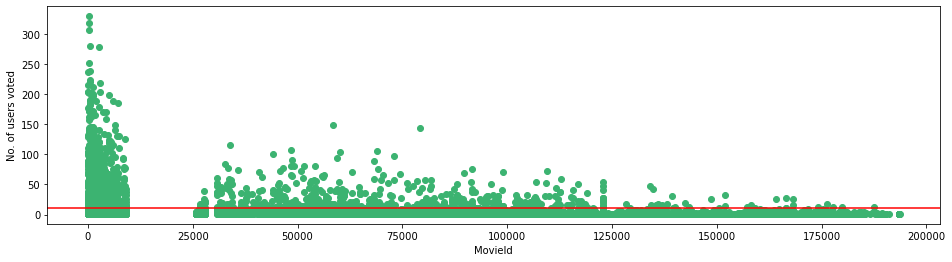

In [28]:
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

In [29]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]


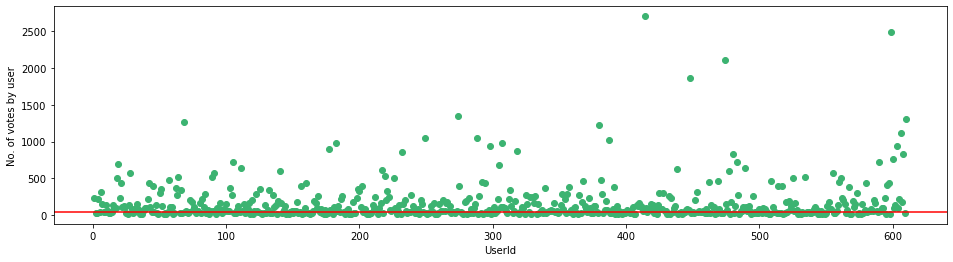

In [30]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [31]:
final_dataset=final_dataset.loc[:,no_movies_voted[no_movies_voted > 50].index]
final_dataset

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
sample = np.array([[0,0,3,0,0],[4,0,0,0,2],[0,0,0,0,1]])
sparsity = 1.0 - ( np.count_nonzero(sample) / float(sample.size) )
print(sparsity)

0.7333333333333334


In [33]:
csr_sample = csr_matrix(sample)
print(csr_sample)

  (0, 2)	3
  (1, 0)	4
  (1, 4)	2
  (2, 4)	1


In [34]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [35]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [36]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies[movies['title'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    else:
        return "No movies found. Please check your input"

In [37]:
get_movie_recommendation('Harry Potter')

,Title,Distance
1,"Lord of the Rings: The Two Towers, The (2002)",0.391128
2,"Incredibles, The (2004)",0.386104
3,Spider-Man (2002),0.379973
4,Star Wars: Episode II - Attack of the Clones (...,0.377116
5,Pirates of the Caribbean: The Curse of the Bla...,0.367811
6,"Monsters, Inc. (2001)",0.363530
7,Shrek (2001),0.342930
8,Harry Potter and the Goblet of Fire (2005),0.284509
9,Harry Potter and the Prisoner of Azkaban (2004),0.271120
10,Harry Potter and the Chamber of Secrets (2002),0.196221


In [38]:
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [39]:
get_movie_recommendation('Dracula: Dead and Loving It')

,Title,Distance
1,Homeward Bound II: Lost in San Francisco (1996),0.595340
2,Barb Wire (1996),0.594520
3,Jack (1996),0.592857
4,Thirteen Ghosts (a.k.a. Thir13en Ghosts) (2001),0.588566
5,"6th Day, The (2000)",0.588331
6,Volcano (1997),0.573785
7,Anaconda (1997),0.562807
8,Tales from the Crypt Presents: Bordello of Blo...,0.559115
9,Small Soldiers (1998),0.555861
10,Sudden Death (1995),0.513191


In [40]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [41]:
df

,movieId,title,userId_x,rating,imdbId,tmdbId,new_genres,userId_y,tag
0,1,Toy Story (1995),1,4.0,114709,862.0,Adventure,336,pixar
1,1,Toy Story (1995),1,4.0,114709,862.0,Adventure,474,pixar
2,1,Toy Story (1995),1,4.0,114709,862.0,Adventure,567,fun
3,1,Toy Story (1995),1,4.0,114709,862.0,Animation,336,pixar
4,1,Toy Story (1995),1,4.0,114709,862.0,Animation,474,pixar
...,...,...,...,...,...,...,...,...,...
765266,193565,Gintama: The Movie (2010),184,3.5,1636780,71172.0,Comedy,184,remaster
765267,193565,Gintama: The Movie (2010),184,3.5,1636780,71172.0,Sci-Fi,184,anime
765268,193565,Gintama: The Movie (2010),184,3.5,1636780,71172.0,Sci-Fi,184,comedy
765269,193565,Gintama: The Movie (2010),184,3.5,1636780,71172.0,Sci-Fi,184,gintama


In [42]:
# Because these tags are so prevalent, we want to preserve  these (28) columns
check = df['tag'].value_counts(normalize=True, ascending=False)
len(check[check > .005])

28

In [43]:
len(check[(.001 < check)  & (check < .005)])

283

In [44]:
bin_1 = list(check[check.values <= 0.00001].index)

In [45]:
bin_2 = list(check[(check.values > 0.00001) & (check.values <= 0.0001)].index)

In [46]:
bin_3 = list(check[(check.values > 0.0001)  & (check.values <= 0.001)].index)

In [47]:
def bin_tag(tag):
    
    if tag in bin_1:
        return 'unimportant'
    
    elif tag in bin_2:
        return 'sparse'
    
    elif tag in  bin_3:
        return 'rare'
    else:
        return tag
        

In [48]:
df['tag_bin'] = df.tag.apply(bin_tag)

In [49]:
df.head()

,movieId,title,userId_x,rating,imdbId,tmdbId,new_genres,userId_y,tag,tag_bin
0,1,Toy Story (1995),1,4.0,114709,862.0,Adventure,336,pixar,pixar
1,1,Toy Story (1995),1,4.0,114709,862.0,Adventure,474,pixar,pixar
2,1,Toy Story (1995),1,4.0,114709,862.0,Adventure,567,fun,fun
3,1,Toy Story (1995),1,4.0,114709,862.0,Animation,336,pixar,pixar
4,1,Toy Story (1995),1,4.0,114709,862.0,Animation,474,pixar,pixar


In [50]:
df['tag_bin'].nunique()

314

In [51]:
# this would be a new column called  "rare tags"
len(check[check <= 0.000002])

35

In [52]:
# this would be a new column called  "rare tags"
tag_sorted[tag_sorted == 1]

Series([], Name: tag, dtype: int64)

In [53]:
features = ['rating','new_genres', 'tag_bin']

In [54]:
#def combine_features(row):
 #   return str(row['rating'])+" "+str(row['new_genres'])+" "+str(row['tag_bin'])

In [55]:
#for feature in features:
#    df[feature] = df[feature].fillna('') #filling all NaNs with blank string
 #   df["combined_features"] = df.apply(combine_features,axis=1) #applying combined_features() method over each rows of dataframe and storing the combined string in “combined_features” column

In [56]:
#cv = CountVectorizer(stop_words='english') #creating new CountVectorizer() object
#count_matrix = cv.fit_transform(df['combined_features']) #feeding combined strings(movie contents) to CountVectorizer() object

In [57]:
# RuntimeError: nnz of the result is too large
#%store count_matrix

In [58]:
#from sklearn.metrics.pairwise import cosine_similarity
#%store -r count_matrix
#cosine_sim = cosine_similarity(count_matrix[:50000])

In [59]:
cosine_sim.shape

NameError: name 'cosine_sim' is not defined

In [ ]:
count_matrix.shape

In [60]:
#!pip  install scipy --upgrade

In [61]:
def get_title_from_index(index):
    return df[df.index == index]['title'].values
def get_index_from_title(title):
    return df[df.title == title].index[0]

In [62]:
movie_user_likes = "Toy Story (1995)"
movie_index = get_index_from_title(movie_user_likes)
 #accessing the row corresponding to given movie to find all the similarity scores for that movie and then enumerating over it

In [63]:
similar_movies = list(enumerate(cosine_sim[movie_index]))

NameError: name 'cosine_sim' is not defined

In [64]:
sorted_similar_movies = sorted(similar_movies,key=lambda x:x[1],reverse=True)[1:]

NameError: name 'similar_movies' is not defined

In [65]:
i=0
print("Top 5 similar movies to "+movie_user_likes+" are:\n")
for element in sorted_similar_movies:
    print(get_title_from_index(element[0]))
    i=i+1
    if i>5:
        break

Top 5 similar movies to Toy Story (1995) are:



NameError: name 'sorted_similar_movies' is not defined

In [66]:
df

,movieId,title,userId_x,rating,imdbId,tmdbId,new_genres,userId_y,tag,tag_bin
0,1,Toy Story (1995),1,4.0,114709,862.0,Adventure,336,pixar,pixar
1,1,Toy Story (1995),1,4.0,114709,862.0,Adventure,474,pixar,pixar
2,1,Toy Story (1995),1,4.0,114709,862.0,Adventure,567,fun,fun
3,1,Toy Story (1995),1,4.0,114709,862.0,Animation,336,pixar,pixar
4,1,Toy Story (1995),1,4.0,114709,862.0,Animation,474,pixar,pixar
...,...,...,...,...,...,...,...,...,...,...
765266,193565,Gintama: The Movie (2010),184,3.5,1636780,71172.0,Comedy,184,remaster,unimportant
765267,193565,Gintama: The Movie (2010),184,3.5,1636780,71172.0,Sci-Fi,184,anime,anime
765268,193565,Gintama: The Movie (2010),184,3.5,1636780,71172.0,Sci-Fi,184,comedy,comedy
765269,193565,Gintama: The Movie (2010),184,3.5,1636780,71172.0,Sci-Fi,184,gintama,unimportant


In [67]:
from surprise import SVD
import numpy as np
import surprise
from surprise import Reader, Dataset
# It is to specify how to read the data frame.
reader = Reader(rating_scale=(1,5))
# create the traindata from the data frame
train_data_mf = Dataset.load_from_df(df[['userId_y', 'movieId', 'rating']], reader)
# build the train set from traindata. 
#It is of dataset format from surprise library
trainset = train_data_mf.build_full_trainset()
svd = SVD(n_factors=100, biased=True, random_state=15, verbose=True)
svd.fit(trainset)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19


In [68]:
#getting predictions of train set
train_preds = svd.test(trainset.build_testset())
train_pred_mf = np.array([pred.est for pred in train_preds])

In [69]:
# Creating a sparse matrix
from scipy import sparse
train_sparse_matrix = sparse.csr_matrix((df.rating.values, (df.userId_y.values, df.movieId.values)))

In [70]:
train_averages = dict()
# get the global average of ratings in our train set.
train_global_average = train_sparse_matrix.sum()/train_sparse_matrix.count_nonzero()
train_averages['global'] = train_global_average
train_averages
#Output: {‘global’: 3.5199769425298757}
#Next, let’s create a function which takes the sparse matrix as input and gives the average ratings of a movie given by all users, and the average rating of all movies given by a single user.
# get the user averages in dictionary (key: user_id/movie_id, value: avg rating)
def get_average_ratings(sparse_matrix, of_users):
# average ratings of user/axes
    ax = 1 if of_users else 0 # 1 - User axes,0 - Movie axes
# ".A1" is for converting Column_Matrix to 1-D numpy array
    sum_of_ratings = sparse_matrix.sum(axis=ax).A1
# Boolean matrix of ratings ( whether a user rated that movie or not)
    is_rated = sparse_matrix!=0
# no of ratings that each user OR movie..
    no_of_ratings = is_rated.sum(axis=ax).A1
# max_user and max_movie ids in sparse matrix
    u,m = sparse_matrix.shape
# create a dictionary of users and their average ratings..
    average_ratings = { i : sum_of_ratings[i]/no_of_ratings[i]
for i in range(u if of_users else m)
    if no_of_ratings[i] !=0}
#return that dictionary of average ratings
    return average_ratings

In [71]:
train_averages['user'] = get_average_ratings(train_sparse_matrix, of_users=True)

In [72]:
train_averages['movie'] = get_average_ratings(train_sparse_matrix, of_users=False)

In [73]:

#user_sim = cosine_similarity(train_sparse_matrix[df.userId_y], train_sparse_matrix).ravel()
#top_sim_users = user_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.

#top_ratings = train_sparse_matrix[top_sim_users, movie].toarray().ravel()

#top_sim_users_ratings = list(top_ratings[top_ratings != 0][:5])
#top_sim_users_ratings.extend([train_averages['movie'][movie]]*(5 -len(top_sim_users_ratings)))

In [74]:

#movie_sim = cosine_similarity(train_sparse_matrix[:,df.movieId].T,
#train_sparse_matrix.T).ravel()
#top_sim_movies = movie_sim.argsort()[::-1][1:]

#top_ratings = train_sparse_matrix[user, top_sim_movies].toarray().ravel()

#top_sim_movies_ratings = list(top_ratings[top_ratings != 0][:5])
#top_sim_movies_ratings.extend([train_averages['userId_y'][user]]*(5-len(top_sim_movies_ratings)))

In [75]:
# prepare train data
x_train = final_data.drop(['userId_y', 'title','rating'], axis=1)
y_train = final_data['rating']
# initialize XGBoost model
xgb_model = xgb.XGBRegressor(silent=False, n_jobs=13,random_state=15,n_estimators=100)
# fit the model
xgb_model.fit(x_train, y_train, eval_metric = 'rmse')

NameError: name 'final_data' is not defined

In [76]:
df

,movieId,title,userId_x,rating,imdbId,tmdbId,new_genres,userId_y,tag,tag_bin
0,1,Toy Story (1995),1,4.0,114709,862.0,Adventure,336,pixar,pixar
1,1,Toy Story (1995),1,4.0,114709,862.0,Adventure,474,pixar,pixar
2,1,Toy Story (1995),1,4.0,114709,862.0,Adventure,567,fun,fun
3,1,Toy Story (1995),1,4.0,114709,862.0,Animation,336,pixar,pixar
4,1,Toy Story (1995),1,4.0,114709,862.0,Animation,474,pixar,pixar
...,...,...,...,...,...,...,...,...,...,...
765266,193565,Gintama: The Movie (2010),184,3.5,1636780,71172.0,Comedy,184,remaster,unimportant
765267,193565,Gintama: The Movie (2010),184,3.5,1636780,71172.0,Sci-Fi,184,anime,anime
765268,193565,Gintama: The Movie (2010),184,3.5,1636780,71172.0,Sci-Fi,184,comedy,comedy
765269,193565,Gintama: The Movie (2010),184,3.5,1636780,71172.0,Sci-Fi,184,gintama,unimportant


In [78]:
from ast import literal_eval
features = ["movieId", "title", "tag", "new_genres"]
for feature in features:
    df[feature] = df[feature].apply(literal_eval)
    df[features].head(10)

ValueError: malformed node or string: 1

In [99]:

#Import the data
movie_titles_data = pd.read_csv('../../data/ml-latest-small/movies.csv')
raw_data = pd.read_csv('../../data/ml-latest-small/ratings.csv')

In [100]:

#Merge our two data sources
merged_data = pd.merge(raw_data, movie_titles_data, on='movieId')
merged_data.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres'], dtype='object')

In [101]:
#Calculate aggregate data
merged_data.groupby('title')['rating'].mean().sort_values(ascending = False)
merged_data.groupby('title')['rating'].count().sort_values(ascending = False)

title
Forrest Gump (1994)                                                               329
Shawshank Redemption, The (1994)                                                  317
Pulp Fiction (1994)                                                               307
Silence of the Lambs, The (1991)                                                  279
Matrix, The (1999)                                                                278
                                                                                 ... 
Late Night Shopping (2001)                                                          1
Late Night with Conan O'Brien: The Best of Triumph the Insult Comic Dog (2004)      1
Late Shift, The (1996)                                                              1
Latter Days (2003)                                                                  1
'71 (2014)                                                                          1
Name: rating, Length: 9719, dtype: int64

In [102]:
#Create a DataFrame and add the number of ratings to is using a count method
ratings_data = pd.DataFrame(merged_data.groupby('title')['rating'].mean())
ratings_data['# of ratings'] = merged_data.groupby('title')['rating'].count()

In [107]:
ratings_data

,rating,# of ratings
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
...,...,...
eXistenZ (1999),3.863636,22
xXx (2002),2.770833,24
xXx: State of the Union (2005),2.000000,5


In [103]:
#Create the ratings matrix and get user ratings for 'Heat (1995)' and `Toy Story (1995)`
ratings_matrix = merged_data.pivot_table(index='userId',columns='title',values='rating')
heat_user_ratings = ratings_matrix['Heat (1995)']
toy_story_user_ratings = ratings_matrix['Toy Story (1995)']
ratings_matrix.corrwith(toy_story_user_ratings)['Heat (1995)']

/Users/mallorywilson/opt/anaconda3/envs/flatiron/lib/python3.8/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/mallorywilson/opt/anaconda3/envs/flatiron/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


0.10646484013036762

In [104]:

#Calculate correlations and source recommendations
correlation_with_heat = pd.DataFrame(ratings_matrix.corrwith(heat_user_ratings))
correlation_with_heat.dropna().sort_values(0, ascending = False).head(15)

,0
title,
Another 48 Hrs. (1990),1.0
Ghosts of Mississippi (1996),1.0
Escape to Witch Mountain (1975),1.0
Andre (1994),1.0
Bread and Tulips (Pane e tulipani) (2000),1.0
Police Story 2 (Ging chaat goo si juk jaap) (1988),1.0
Brassed Off (1996),1.0
Police Story (Ging chaat goo si) (1985),1.0
Music of the Heart (1999),1.0


In [105]:
#Add the number of ratings and rename columns
correlation_with_heat = correlation_with_heat.join(ratings_data['# of ratings'])
correlation_with_heat.columns = ['Corr. With Heat Ratings', '# of Ratings']
correlation_with_heat.index.names = ['Movie Title']

In [106]:
#Get new recommendations from movies that have more than 50 ratings
correlation_with_heat[correlation_with_heat['# of Ratings'] > 50].sort_values('Corr. With Heat Ratings', ascending = False).head(10)

,Corr. With Heat Ratings,# of Ratings
Movie Title,,
Heat (1995),1.000000,102
Philadelphia (1993),0.686060,66
Slumdog Millionaire (2008),0.662325,71
Léon: The Professional (a.k.a. The Professional) (Léon) (1994),0.651800,133
"Bourne Ultimatum, The (2007)",0.611546,81
Aliens (1986),0.597448,126
I Am Legend (2007),0.574709,62
Inception (2010),0.565437,143
Army of Darkness (1993),0.550348,51


/Users/mallorywilson/opt/anaconda3/envs/flatiron/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


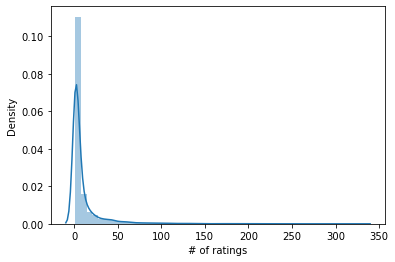

In [98]:

sns.distplot(ratings_data['# of ratings'])

#sns.distplot(ratings_data['rating'])

In [108]:
df

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [111]:
from surprise import Dataset, Reader
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import cross_validate, train_test_split #must use surprise

In [112]:

# for Surprise, we only need three columns from the dataset
data = df[['userId', 'movieId', 'rating']]
reader = Reader(line_format='user item rating', sep=',')
data = Dataset.load_from_df(data, reader=reader) #loads Pandas df 

# train-test-split
trainset, testset = train_test_split(data, test_size=.2)

In [113]:

# instantiate SVD and fit the trainset
svd = SVD() # default values
svd.fit(trainset)

In [114]:
predictions = svd.test(testset)
accuracy.rmse(predictions)

RMSE: 0.8673


0.8672735901082311

In [115]:
print("Number of users: ", df.userId.nunique()) 
print("Number of movies: ", df.movieId.nunique())

Number of users:  610
Number of movies:  9724


In [116]:

user = 5
item = 141
svd.predict(user, item)

Prediction(uid=5, iid=141, r_ui=None, est=3.5241488642786485, details={'was_impossible': False})

In [119]:
!pip3 install xgboost

     |████████████████████████████████| 1.2 MB 5.3 MB/s eta 0:00:01


In [121]:
import xgboost as xgb
# prepare train data
x_train = df.drop(['userId', 'title','rating'], axis=1)
y_train = df['rating']
# initialize XGBoost model
xgb_model = xgb.XGBRegressor(silent=False, n_jobs=13,random_state=15,n_estimators=100)
# fit the model
xgb_model.fit(x_train, y_train, eval_metric = 'rmse')

XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/Users/mallorywilson/opt/anaconda3/envs/flatiron/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/mallorywilson/opt/anaconda3/envs/flatiron/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


In [ ]:
#dictionaries for storing train and test results
test_results = dict()
# from the trained model, get the predictions
y_est_pred = xgb_model.predict(x_test)
# get the rmse and mape of train data
rmse = np.sqrt(np.mean([ (y_test.values[i] - y_test_pred[i])**2 for i in
range(len(y_test_pred)) ]))
mape = np.mean(np.abs( (y_test.values- y_test_pred)/y_true.values )) * 100
# store the results in train_results dictionary
test_results = {'rmse': rmse_test, 'mape' : mape_test, 'predictions' : y_test_pred}

In [84]:
df = pd.merge(raw_data, movie_titles_data, on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [85]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


/Users/mallorywilson/opt/anaconda3/envs/flatiron/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


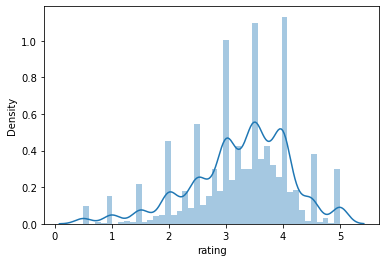

In [86]:
sns.distplot(ratings['rating'])

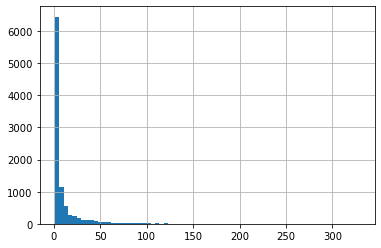

In [87]:
ratings['num of ratings'].hist(bins=70)

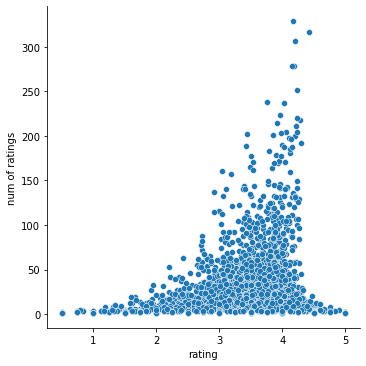

In [88]:
sns.relplot(x='rating' , y='num of ratings' , data=ratings)

In [89]:
moviepvt  =  df.pivot_table(index='userId' , columns='title' , values='rating')
moviepvt.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
ratings.sort_values('num of ratings' , ascending=False).head(10)

,rating,num of ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [91]:
Jurassic_ratings = moviepvt['Jurassic Park (1993)']
Jurassic_ratings.tail()

userId
606    2.5
607    4.0
608    3.0
609    3.0
610    5.0
Name: Jurassic Park (1993), dtype: float64

In [93]:
Forrest_ratings = moviepvt['Forrest Gump (1994)']
Forrest_ratings.tail()

userId
606    4.0
607    NaN
608    3.0
609    4.0
610    3.0
Name: Forrest Gump (1994), dtype: float64

In [94]:
Jurassic_correlate = moviepvt.corrwith(Jurassic_ratings)
Forrest_correlate = moviepvt.corrwith(Forrest_ratings);

/Users/mallorywilson/opt/anaconda3/envs/flatiron/lib/python3.8/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/mallorywilson/opt/anaconda3/envs/flatiron/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [95]:
corr_jurassic = pd.DataFrame(Jurassic_correlate,columns=['Similarity'])
corr_jurassic.dropna(inplace=True)
corr_jurassic.sort_values('Similarity',ascending=False).head(10)

,Similarity
title,
In the Valley of Elah (2007),1.0
The Overnight (2015),1.0
Monkey Business (1952),1.0
"Cup, The (Phörpa) (1999)",1.0
Fear (1996),1.0
Feast (2005),1.0
Police Story 2 (Ging chaat goo si juk jaap) (1988),1.0
Insidious (2010),1.0
"Whistleblower, The (2010)",1.0


In [96]:
corr_Forrest = pd.DataFrame(Forrest_correlate,columns=['Similarity'])
corr_Forrest.dropna(inplace=True)
corr_Forrest.sort_values('Similarity',ascending=False).head(10)

,Similarity
title,
Lost & Found (1999),1.0
"Century of the Self, The (2002)",1.0
The 5th Wave (2016),1.0
Play Time (a.k.a. Playtime) (1967),1.0
Memories (Memorîzu) (1995),1.0
Playing God (1997),1.0
Killers (2010),1.0
"Girl Walks Home Alone at Night, A (2014)",1.0
Tampopo (1985),1.0


In [122]:
 df

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [128]:
data = df.drop(columns=['timestamp','genres', 'title'], axis=1
              )

In [129]:
from surprise import Reader, Dataset
# read in values as Surprise dataset 
reader = Reader()
data = Dataset.load_from_df(data, reader)

In [130]:
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV
import numpy as np

In [131]:
params = {'n_factors': [20, 50, 100],
         'reg_all': [0.02, 0.05, 0.1]}
g_s_svd = GridSearchCV(SVD,param_grid=params,n_jobs=-1)
g_s_svd.fit(data)

In [132]:
# print out optimal parameters for SVD after GridSearch
print(g_s_svd.best_score)
print(g_s_svd.best_params)


{'rmse': 0.8689999522662102, 'mae': 0.667824095892114}
{'rmse': {'n_factors': 50, 'reg_all': 0.05}, 'mae': {'n_factors': 100, 'reg_all': 0.05}}
